The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The file exists


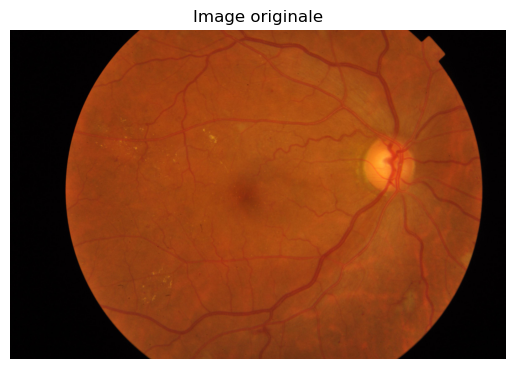

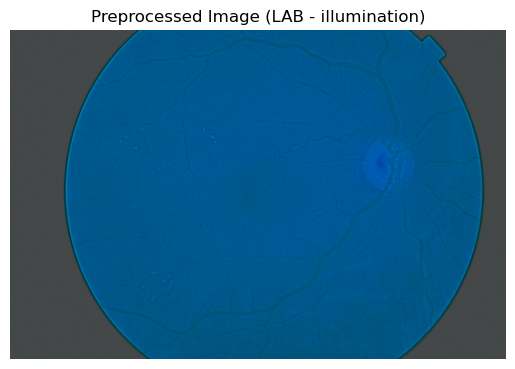

In [22]:
%load_ext autoreload
%autoreload 2
from fundus_prepro.script.core import preprocess_image
from fundus_prepro.utils.io import read_image, save_image
from fundus_prepro.utils.plot import plot_image

image_path = '/home/florian/Documents/donnees_medicales/aptos/train/1ade1e949383.png'  
output_path = '/home/florian/Documents/output_image.png'  
origin_path = '/home/florian/Documents/origin_image.png'  
color_space = 'RGB'  # Peut être 'LAB' ou 'HSV' ou RGB
preprocessing_method = 'illumination'  
# Peut être 'CLAHE', 'Bilateral', 'Tophat', 'Gaussian', 'IntensityNorm', Blackhat
# combinaison5, combinaison4, combinaison3, combinaison2, combinaison1

# Lecture 
image = read_image(image_path)

# Prétraitement
preprocessed_image = preprocess_image(image_path, color_space, preprocessing_method)

# Enregistrement
save_image(preprocessed_image, output_path)

# Affichage
plot_image(image) 
plot_image(preprocessed_image, title=f'Preprocessed Image ({color_space} - {preprocessing_method})')